# K-fold cross-validation

Here is an example of how you might implement k-fold cross validation in Python without using the scikit-learn package. The function takes in the data and labels as arguments, and k is the number of folds. The function first computes the indices for the data, shuffles them and for each fold, it takes k-1 folds as training data and 1 fold as test data. Then train and evaluate the model on train_data and train_labels and test the model on test_data and test_labels.

This is a simple example of a k-fold cross validation, you can always add more feature to it and adjust it to your needs.

In [1]:
import numpy as np

indices = np.arange(15)
print(indices)
np.random.shuffle(indices)
print(indices)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 1  3 12 14  4  2 13 10  7  6 11  5  0  8  9]


In [2]:

def k_fold_cv(data, labels, k=5):
    n = data.shape[0]
    fold_size = n // k
    indices = np.arange(n)
    np.random.shuffle(indices)

    for fold in range(k): 
        start = fold * fold_size
        end = (fold + 1) * fold_size
        test_indices = indices[start:end] # validation
        train_indices = np.concatenate([indices[:start], indices[end:]])
        train_data, train_labels = data[train_indices], labels[train_indices]
        test_data, test_labels = data[test_indices], labels[test_indices]

        # train and evaluate model on train_data and train_labels
        # test model on test_data and test_labels


### Example when scikit-learn is used.

In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

#Loading the dataset
data = load_breast_cancer(as_frame = True)
df = data.frame
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

#Implementing cross validation

k = 5
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')

acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    
    acc = f1_score(y_test, pred_values)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k

print('f1_score of each fold - {}'.format(acc_score))
print('Avg f1_score : {}'.format(avg_acc_score))

f1_score of each fold - [0.9019607843137255, 0.9545454545454546, 0.9795918367346939, 0.9822485207100592, 0.9707602339181286]
Avg f1_score : 0.9578213660444124


# Logistic Regression
We'll use `make_moon` dataset from `sklearn` in this Lab.

### Setup
Run the cells below to load the data and prepare the input features and targets.

Text(0.5, 1.0, 'Scatter Plot')

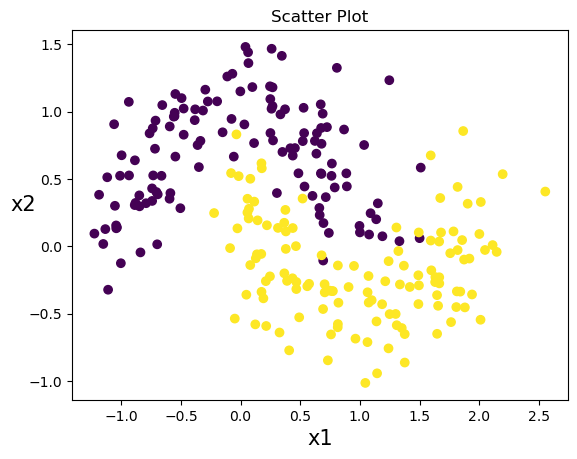

In [4]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

def Load_data():
    x, y = make_moons(250, noise=0.25)
    x_new = np.linspace(-1.5, 2.5)
    return x,y,x_new

x, y, x_new = Load_data()

col = ['r', 'b']
plt.figure()
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel('x1',fontsize=15)
plt.ylabel('x2',rotation=0, fontsize=15)
plt.title('Scatter Plot')

### Step 1: Initialize the Model

Run the cells below to initial the parameters.

In [5]:
class LogisticRegressionUsingGD:
    def __init__(self, eta, n_iterations):
        self.dim = 2
        self.w = np.array([1.0,1.0])
        self.b = 0
        self.eta = eta
        self.n_iterations = n_iterations

### Step 2: Define the Training Function

Run the cells below to define the fit function.

In [6]:
def fit(self,x,y,eta):
    itr = 0
    self.eta = eta  # learning rate
    row, column = np.shape(x)
    print('number of samples:', row)
    while itr <= self.n_iterations:
        fx = np.dot(self.w, x.T) + self.b
        hx = self.sigmoid(fx)
        t = (hx-y)
        """
            Parameters
            ----------
            i[0]:t 
            i[1][0]:x1 
            i[1][1]:x2
            Returns
            -------
        """

        s = [[i[0]*i[1][0],i[0]*i[1][1]] for i in zip(t,x)]
        gradient_w = np.sum(s, 0)/row * self.eta
        gradient_b = np.sum(t, 0)/row * self.eta
        self.w -= gradient_w
        self.b -= gradient_b
        itr += 1


### Step 3: Define the Predict Function

Run the cells below to define the predict function.

In [7]:
def predict(self,x_test):
        ypts = (self.w[0] * x_test + self.b) / (-self.w[1])
        return ypts

### Step 4: Run the Model

[1. 1.]
number of samples: 250


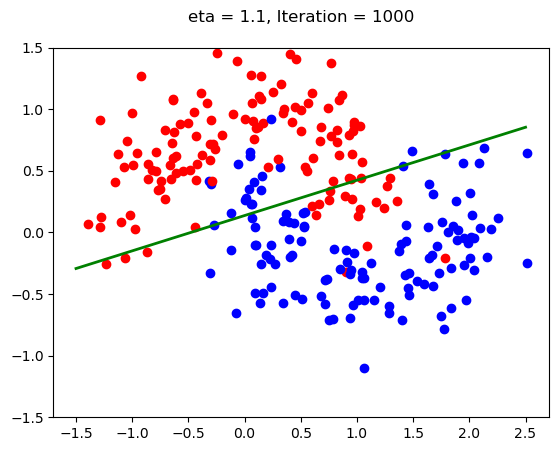

In [11]:
#!/bin/bash/env python
#-*- coding: utf-8

import numpy as np
from sklearn.datasets import make_moons

class LogisticRegressionUsingGD:
    def __init__(self, eta, n_iterations):
        self.dim = 2
        self.w = np.array([1.0,1.0])
        print(self.w)
        self.b = 0
        self.eta = eta
        self.n_iterations = n_iterations


    def sigmoid(self, x):
        return 1.0/(1+np.exp(-x))

    def fit(self,x,y):
        itr = 0
        row, column = np.shape(x)
        print('number of samples:', row)
        while itr <= self.n_iterations:
            fx = np.dot(self.w, x.T) + self.b
            hx = self.sigmoid(fx)
            t = (hx-y)
         
            # i[0]:t i[1][0]:x1 i[1][1]:x2
            s = [[i[0]*i[1][0],i[0]*i[1][1]] for i in zip(t,x)]
            gradient_w = np.sum(s, 0)/row * self.eta
            gradient_b = np.sum(t, 0)/row * self.eta
            self.w -= gradient_w
            self.b -= gradient_b
            itr += 1
            
        
            
    def visualize(self,x_test):
        ypts = (self.w[0] * x_test + self.b) / (-self.w[1])
        return ypts

if __name__ == '__main__':
    import matplotlib.pyplot as plt
    x, y = make_moons(250, noise=0.25)
    xpts = np.linspace(-1.5, 2.5)  # Return evenly spaced numbers over a specified interval.
    
    col = {0:'r',1:'b'}
    model = LogisticRegressionUsingGD(eta=1.1, n_iterations=1000)
    model.fit(x,y)
    ypts= model.visualize(xpts)
    
    plt.figure()
    for i in range(250):
        plt.plot(x[i, 0], x[i, 1], col[y[i]] + 'o')
    plt.ylim([-1.5,1.5])
    plt.plot(xpts,ypts, 'g-', lw = 2)
    plt.title('eta = %s, Iteration = %s\n' % (str(model.eta), str(model.n_iterations)))
    plt.show()